In [1]:
# Cell 1: Imports + extension
import numpy as np
import matplotlib.pyplot as plt
import panel as pn

pn.extension()



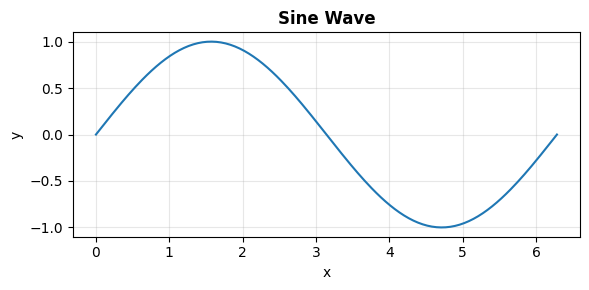

In [2]:
# Widgets
freq = pn.widgets.FloatSlider(name="Frequency", start=0.1, end=5.0, step=0.1, value=1.0)
amp  = pn.widgets.FloatSlider(name="Amplitude", start=0.1, end=2.0, step=0.1, value=1.0)
npts = pn.widgets.IntSlider(name="Points", start=50, end=1000, step=50, value=200)

# Plot function returning a Matplotlib figure
def make_fig(frequency, amplitude, points):
    x = np.linspace(0, 2*np.pi, points)
    y = amplitude * np.sin(frequency * x)

    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(x, y)
    ax.set_title("Sine Wave", fontweight="bold")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True, alpha=0.3)
    fig.tight_layout()
    return fig

# Bind widgets -> function
bound_plot = pn.bind(make_fig, frequency=freq, amplitude=amp, points=npts)

# Turn Matplotlib fig into a Panel pane (updates on change)
plot_pane = pn.panel(bound_plot, sizing_mode="stretch_width")

In [4]:
# Template with sidebar
tmpl = pn.template.FastListTemplate(
    site="Demo",
    title="Matplotlib + pn.bind + Template",
    sidebar=[pn.pane.Markdown("### Controls"), freq, amp, npts],
    main=[plot_pane],
    header_background="#3b82f6",
)

# Serve this
tmpl.servable()


Launching server at http://localhost:65075
